In [1]:
from typing import List
from typing import Tuple
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

from tqdm import tqdm
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})


In [7]:
data = pd.read_csv("Data.csv")
data.head()
x= data['x'].values
y= data['y'].values
print(type(x))

m=np.mean(x)
v=np.var(x)
s=np.std(x)
print(m,v,s)

<class 'numpy.ndarray'>
2.5 103.10898350000001 10.154259377226879


In [3]:
# simple linear regression with the `statsmodels` library
model_1 = smf.ols(formula='y ~ x', data=data)
result_1 = model_1.fit()
print(result_1.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     864.6
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           3.61e-74
Time:                        22:09:58   Log-Likelihood:                -1157.0
No. Observations:                 200   AIC:                             2318.
Df Residuals:                     198   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.8043      5.764     -5.518      0.0

In [33]:
#Now. running Quadratic Regression
x=np.array(x)
mew=x.reshape(200,1)
y=np.array(y).reshape(200,1)
polynomial_features= PolynomialFeatures(degree=2) #Generating the Quadratic polynomial
xp = polynomial_features.fit_transform(mew)

In [34]:
model = sm.OLS(y, xp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     445.1
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           8.42e-74
Time:                        23:39:35   Log-Likelihood:                -1154.2
No. Observations:                 200   AIC:                             2314.
Df Residuals:                     197   BIC:                             2324.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.0505      8.138     -2.218      0.028     -34.100      -2.001
x1            16.9156      0.622     27.197      0.000      15.689      18.142
x2            -0.1420      0.060     -2.367      0.019      -0.260      -0.024
==============================================================================
Omnibus:                        1.590   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.389
Skew:                           0.047   Prob(JB):                        0.499
Kurtosis:                       2.603   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: ignored

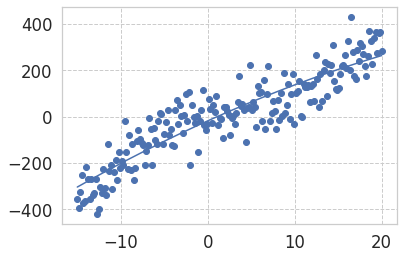

In [26]:
#ypred = model.predict(xp) 
#plt.scatter(x,y)
#plt.plot(x,ypred)
#plt.plot(x,yresult)